In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import image
from nilearn import signal
from nilearn.maskers import NiftiMasker
from nilearn.maskers import NiftiMapsMasker
from nilearn.plotting import plot_roi, plot_stat_map,plot_epi, plot_img
from nilearn.image import new_img_like
import nilearn as nl 
import nibabel as nib
from nilearn import datasets
from sklearn.decomposition import PCA
import bids
import os
import glob
from nltools import Brain_Data
import seaborn as sns


# Homemade functions

In [25]:
def fit_mask_get_mean(current_mask, sub_data):
    try:
        fit_2_mask = current_mask.fit_transform(sub_data)
        mean_score = np.mean(fit_2_mask)
    except ValueError:
        mean_score = 0
    return mean_score

# Open Hassen Neurotransmitters Maps

In [3]:
# Now open a directory/folder 
fd = os.open("/Users/luisalvarez/Documents", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents


In [9]:
# Define paths to Hassen files. 
path_D1 = "GitHub/hansen_receptors/data/PET_nifti_images/D1_SCH23390_hc13_kaller.nii"
path_D2_smith = "GitHub/hansen_receptors/data/PET_nifti_images/D2_flb457_hc37_smith.nii.gz"
path_D2_sandiego = "GitHub/hansen_receptors/data/PET_nifti_images/D2_flb457_hc55_sandiego.nii.gz"
path_DAT = "GitHub/hansen_receptors/data/PET_nifti_images/DAT_fpcit_hc174_dukart_spect.nii"

# Create Brain_data objects for each file. 
D1_map = Brain_Data(path_D1).to_nifti()
D2_smith_map = Brain_Data(path_D2_smith).to_nifti()
D2_sandiego_map = Brain_Data(path_D2_sandiego).to_nifti()
DAT_map = Brain_Data(path_DAT).to_nifti()

# Check the shape of each file.
print("D1_map shape: " + str(D1_map.shape))
print("D2_smith_map shape: " + str(D2_smith_map.shape))
print("D2_sandiego_map shape: " + str(D2_sandiego_map.shape))
print("DAT_map shape: " + str(DAT_map.shape))



D1_map shape: (91, 109, 91)
D2_smith_map shape: (91, 109, 91)
D2_sandiego_map shape: (91, 109, 91)
DAT_map shape: (91, 109, 91)


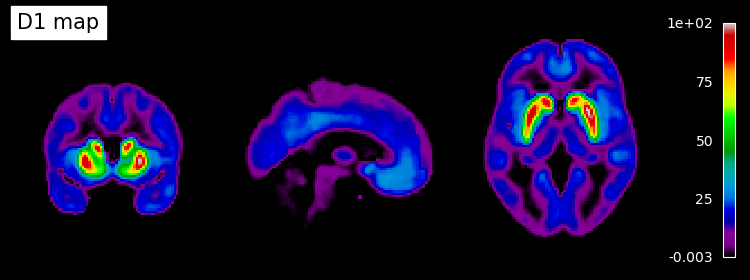

In [18]:
# Visualize the D1 map.
plot_epi(D1_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="D1 map")


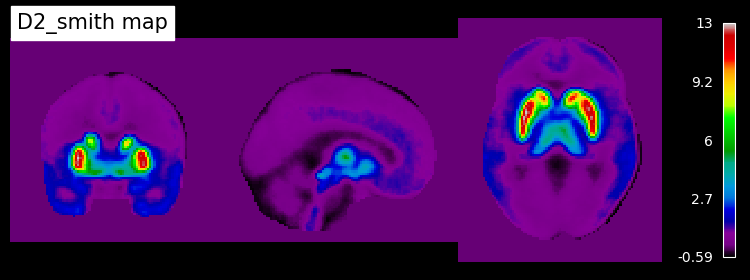

In [19]:
# Visualize the D2_smith map.
plot_epi(D2_smith_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="D2_smith map")


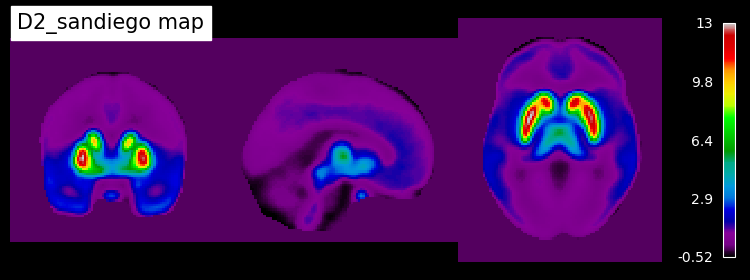

In [20]:
# Visualize the D2_sandiego map.
plot_epi(D2_sandiego_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="D2_sandiego map")


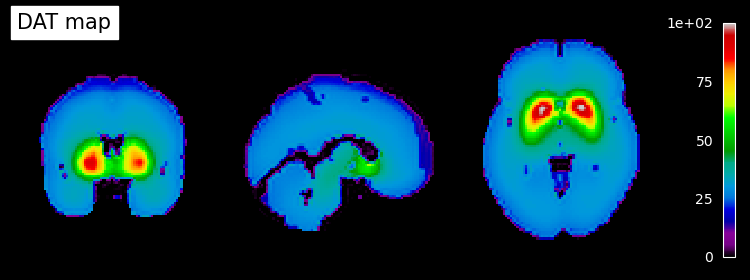

In [21]:
# Visualize the DAT map.
plot_epi(DAT_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="DAT map")

## Compare Neurotransmitter Densities to AA map 

In [23]:
# Load the AAL atlas from nilearn.
AA = datasets.fetch_atlas_aal()

# Store atlas info.
AA_maps = AA.maps 

AA_labels = AA.labels

AA_indices = AA.indices

print("AA_labels: " + str(AA_labels))
print("AA_indices: " + str(AA_indices))

AA_labels: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusif

In [24]:
# Compute a mask for each parcel in the AAL atlas. 
aal_roi_masks = []

for x in range(116):
    
    print("Computing and plotting roi_" +str(x) +": " + str(AA_labels[x]))
    roi_img =nl.image.new_img_like(AA_maps, nl.image.get_data(AA_maps) == int(AA_indices[x]))
    masker = NiftiMasker(mask_img=roi_img, verbose=False).fit()
    aal_roi_masks.append(masker)
    

Computing and plotting roi_0: Precentral_L
Computing and plotting roi_1: Precentral_R
Computing and plotting roi_2: Frontal_Sup_L
Computing and plotting roi_3: Frontal_Sup_R
Computing and plotting roi_4: Frontal_Sup_Orb_L
Computing and plotting roi_5: Frontal_Sup_Orb_R
Computing and plotting roi_6: Frontal_Mid_L
Computing and plotting roi_7: Frontal_Mid_R
Computing and plotting roi_8: Frontal_Mid_Orb_L
Computing and plotting roi_9: Frontal_Mid_Orb_R
Computing and plotting roi_10: Frontal_Inf_Oper_L
Computing and plotting roi_11: Frontal_Inf_Oper_R
Computing and plotting roi_12: Frontal_Inf_Tri_L
Computing and plotting roi_13: Frontal_Inf_Tri_R
Computing and plotting roi_14: Frontal_Inf_Orb_L
Computing and plotting roi_15: Frontal_Inf_Orb_R
Computing and plotting roi_16: Rolandic_Oper_L
Computing and plotting roi_17: Rolandic_Oper_R
Computing and plotting roi_18: Supp_Motor_Area_L
Computing and plotting roi_19: Supp_Motor_Area_R
Computing and plotting roi_20: Olfactory_L
Computing and p

In [26]:
# Fit AAL to Hassen Neurotransmitters maps. 

D1_to_AAL_mean_scores = []
D2_smith_to_AAL_mean_scores = []
D2_sd_to_AAL_mean_scores = []
DAT_to_AAL_mean_scores = []

for current_roi in range(116):

    D1_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], D1_map))
    D2_smith_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], D2_smith_map))
    D2_sd_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], D2_sandiego_map))
    DAT_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], DAT_map))


In [29]:
# Get AAL COC-PLA change scores csv file. 
Change_PC1_AA_scores_df = pd.read_csv('/Users/luisalvarez/Documents/GitHub/ResearchElective_Maastricht2023/AAL_COCPLA_Change_PC1_scores.csv', index_col=0) 

# Calculate mean change score for each region.
Change_PC1_AA_mean_scores = []

for x in range(len(AA_labels)):
    Change_PC1_AA_mean_scores.append(Change_PC1_AA_scores_df[AA_labels[x]].mean(skipna=True))


### Correlation between Hassen Maps and AAL PC1 scores

In [33]:
# Compute correlation between Hassen maps and AAL PC1 scores 

D1_AAl_cor = np.corrcoef(Change_PC1_AA_mean_scores, D1_to_AAL_mean_scores)
D2_smith_AAl_cor = np.corrcoef(Change_PC1_AA_mean_scores, D2_smith_to_AAL_mean_scores)
D2_sd_AAl_cor = np.corrcoef(Change_PC1_AA_mean_scores, D2_sd_to_AAL_mean_scores)
DAT_AAl_cor = np.corrcoef(Change_PC1_AA_mean_scores, DAT_to_AAL_mean_scores)

print("Correlation between D1 map and AAL PC1 scores: " + str(D1_AAl_cor[0, 1]))
print("Correlation between D2 map and AAL PC1 scores: " + str(D2_smith_AAl_cor[0, 1]))
print("Correlation between D2 map and AAL PC1 scores: " + str(D2_sd_AAl_cor[0, 1]))
print("Correlation between DAT map and AAL PC1 scores: " + str(DAT_AAl_cor[0, 1]))


Correlation between D1 map and AAL PC1 scores: 0.003354097905176425
Correlation between D2 map and AAL PC1 scores: -0.15696777105807386
Correlation between D2 map and AAL PC1 scores: -0.1764771374873583
Correlation between DAT map and AAL PC1 scores: -0.1671451637142172


[Text(0.5, 1.0, 'Correlation between D1 and Change scores(COC-PLA)')]

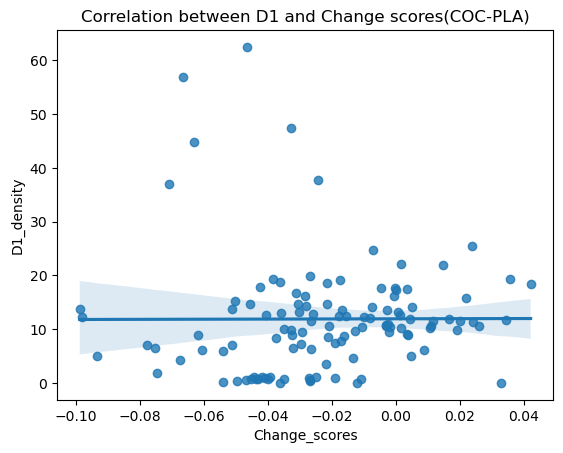

In [50]:
all_data_AAL = np.array([Change_PC1_AA_mean_scores, D1_to_AAL_mean_scores, D2_smith_to_AAL_mean_scores, D2_sd_to_AAL_mean_scores, DAT_to_AAL_mean_scores])

Neurotransmitters_AAl_scores = pd.DataFrame(data=all_data_AAL.T, columns=["Change_scores", "D1_density", "D2_s_density", "D2_sd_density", "DAT_density"])

sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="D1_density").set(title='Correlation between D1 and Change scores(COC-PLA)')

[Text(0.5, 1.0, 'Correlation between D2_s and Change scores(COC-PLA)')]

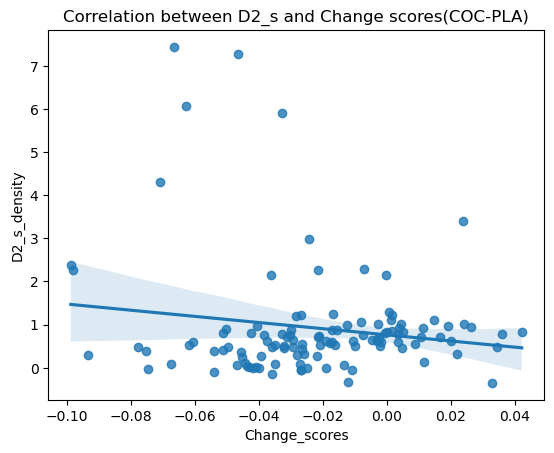

In [51]:
sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="D2_s_density").set(title='Correlation between D2_s and Change scores(COC-PLA)')


[Text(0.5, 1.0, 'Correlation between D2_sd and Change scores(COC-PLA)')]

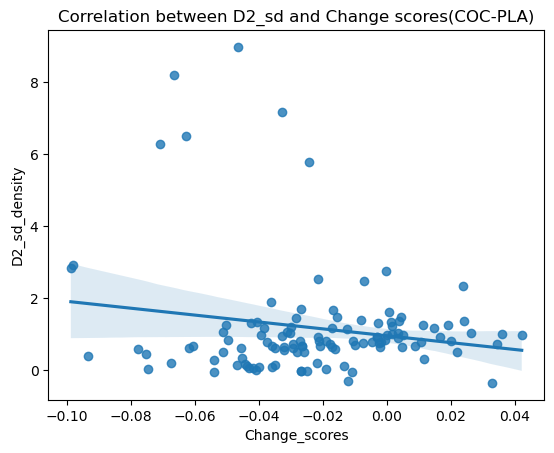

In [52]:
sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="D2_sd_density").set(title='Correlation between D2_sd and Change scores(COC-PLA)')

[Text(0.5, 1.0, 'Correlation between DAT and Change scores(COC-PLA)')]

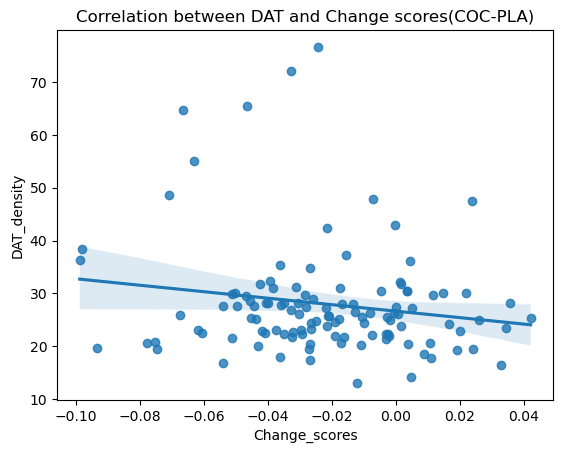

In [53]:
sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="DAT_density").set(title='Correlation between DAT and Change scores(COC-PLA)')
